In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [19]:
train_data = pd.read_csv(r'/content/train.csv')
test_data = pd.read_csv(r'/content/test.csv')

In [20]:
train_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [21]:
test_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [22]:
train_data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [96]:
train_data.shape

(550068, 10)

In [24]:
train_data.drop(['User_ID'],inplace=True,axis=1)
train_data.drop(['City_Category'],inplace=True,axis=1)

In [25]:
from sklearn import preprocessing
label = preprocessing.LabelEncoder()
train_data['Gender']=label.fit_transform(train_data['Gender'])
train_data['Age']=label.fit_transform(train_data['Age'])

In [26]:
train_data.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,2,0,3,NaN,NaN,8370
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200
2,P00087842,0,0,10,2,0,12,NaN,NaN,1422
3,P00085442,0,0,10,2,0,12,14.0,NaN,1057
4,P00285442,1,6,16,4+,0,8,NaN,NaN,7969


In [27]:
train_data.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [28]:
train_data['Product_Category_2'].value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [29]:
train_data['Product_Category_3'].value_counts()

16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: Product_Category_3, dtype: int64

In [30]:
train_data['Product_Category_2'] = train_data['Product_Category_2'].fillna(train_data['Product_Category_2'].mode()[0])
train_data['Product_Category_3'] = train_data['Product_Category_3'].fillna(train_data['Product_Category_3'].mode()[0])

In [31]:
train_data.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,2,0,3,8.0,16.0,8370
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200
2,P00087842,0,0,10,2,0,12,8.0,16.0,1422
3,P00085442,0,0,10,2,0,12,14.0,16.0,1057
4,P00285442,1,6,16,4+,0,8,8.0,16.0,7969


In [32]:
train_data.isnull().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


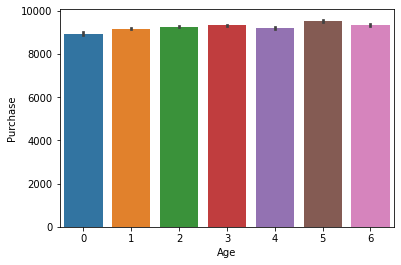

In [34]:
sb.barplot('Age','Purchase',data=train_data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


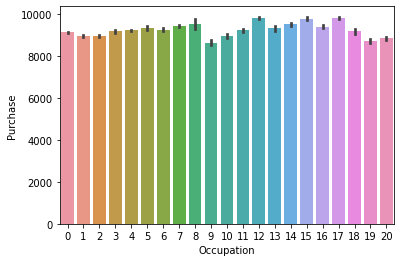

In [36]:
sb.barplot('Occupation','Purchase',data=train_data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


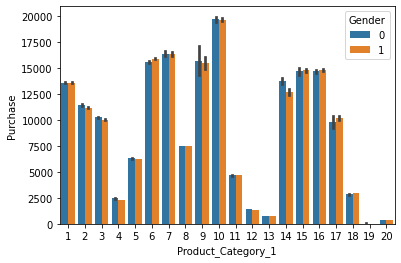

In [42]:
sb.barplot('Product_Category_1','Purchase',hue='Gender',data=train_data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


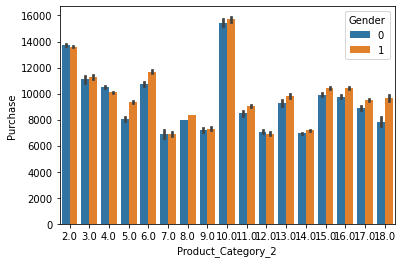

In [40]:
sb.barplot('Product_Category_2','Purchase',hue='Gender',data=train_data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


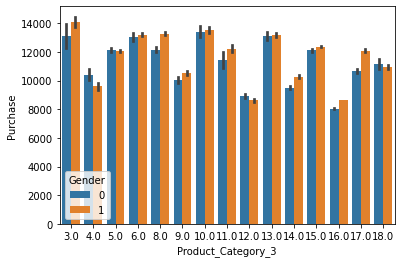

In [41]:
sb.barplot('Product_Category_3','Purchase',hue='Gender',data=train_data)

In [63]:
train_data['Stay_In_Current_City_Years']=train_data['Stay_In_Current_City_Years'].str.replace('+','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [65]:
x=train_data.iloc[:,1:9]
y=train_data['Purchase']
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state = 3)

In [102]:
dt_model = DecisionTreeRegressor()

#HyperTunning

param = {'max_depth':[7,8,9],
         'min_samples_split':[300,350,400],
         'min_samples_leaf':[150,200,250]
         }
gscv = GridSearchCV(dt_model,param,n_jobs=-1,verbose=3)
gscv.fit(train_x,train_y)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [7, 8, 9],
                         'min_samples_leaf': [150, 200, 250],
                         'min_samples_split': [300, 350, 400]},
             verbose=3)

In [98]:
gscv.best_params_

{'max_depth': 9, 'min_samples_leaf': 250, 'min_samples_split': 400}

In [99]:
model_final = DecisionTreeRegressor(max_depth=9,min_samples_leaf=250,min_samples_split=400)
model_final.fit(train_x,train_y)

DecisionTreeRegressor(max_depth=9, min_samples_leaf=250, min_samples_split=400)

In [100]:
y_pred = model_final.predict(test_x)

In [101]:
r2_score(test_y,y_pred)

0.6516309500530033

In [93]:
R_model = RandomForestRegressor(max_depth=7, min_samples_leaf=6, min_samples_split=130)
R_model.fit(train_x,train_y)

RandomForestRegressor(max_depth=7, min_samples_leaf=6, min_samples_split=130)

In [94]:
R_pred = R_model.predict(test_x)

In [95]:
r2_score(test_y,R_pred)

0.6489173107328114